In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
from pathlib import Path
from mdgraph.data.preprocess import parallel_preprocess
from mdgraph.data.utils import concatenate_h5, parse_h5

In [2]:
traj_files = sorted(Path("/homes/heng.ma/Research/FoldingTraj/1FME-0/1FME-0-protein/").glob("*dcd"))
topology_files = ["/homes/abrace/src/pytorch-geometric-sandbox/test/data/1FME-unfolded.pdb"] * len(traj_files)
ref_topology = "/homes/abrace/src/pytorch-geometric-sandbox/test/data/1FME-folded.pdb"
save_files = [f"/homes/abrace/tmp/test_pyG_preprocess/test_{i}.h5" for i in range(len(traj_files))]
concatenated_save_file = "/homes/abrace/src/pytorch-geometric-sandbox/test/data/BBA-full.h5"

In [14]:
parallel_preprocess(
    topology_files,
    traj_files,
    ref_topology,
    save_files,
    cutoff=8.0,
    selection="protein and name CA",
    print_every=10000,
    num_workers=20,
)

0it [00:00, ?it/s]/lambda_stor/homes/abrace/src/pytorch-geometric-sandbox/env/lib/python3.7/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/lambda_stor/homes/abrace/src/pytorch-geometric-sandbox/env/lib/python3.7/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`

/lambda_stor/homes/abrace/src/pytorch-geometric-sandbox/env/lib/python3.7/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/lambda_stor/homes/abrace/src/pytorch-geometric-sandbox/env/lib/python3.7/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to 

Traj length:  10000


/lambda_stor/homes/abrace/src/pytorch-geometric-sandbox/env/lib/python3.7/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/lambda_stor/homes/abrace/src/pytorch-geometric-sandbox/env/lib/python3.7/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

In [15]:
concatenate_h5(save_files, concatenated_save_file)

In [11]:
data = parse_h5(
    concatenated_save_file,
    fields=["contact_map_values"]#"contact_map", "contact_map_values", "rmsd", "fnc", "point_cloud", "amino_acids"]
)

In [23]:
vals = data["contact_map_values"]

In [24]:
import math
import numpy as np
import pandas as pd
vals = np.concatenate(vals)

In [39]:
inverse_vals = 1 / np.where(vals == 0, 1, vals)
log_inverse_vals = np.log(inverse_vals)
neglog = -1 * np.log(np.where(vals == 0, 1, vals))
df = pd.DataFrame({"vals": vals, "inverse_vals": inverse_vals, "log_inverse_vals": log_inverse_vals, "neglog": neglog})

<AxesSubplot:>

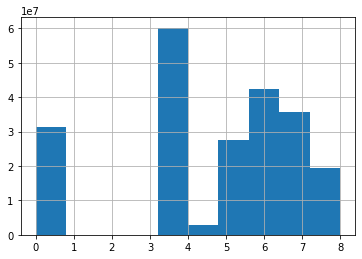

In [32]:
df["vals"].hist()

<AxesSubplot:>

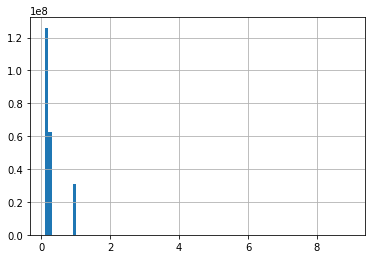

In [36]:
df["inverse_vals"].hist(bins=100)

<AxesSubplot:>

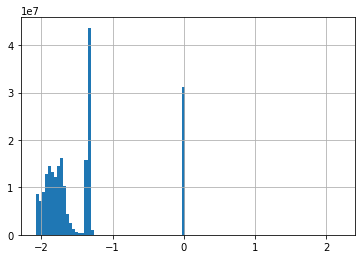

In [35]:
df["log_inverse_vals"].hist(bins=100)

<AxesSubplot:>

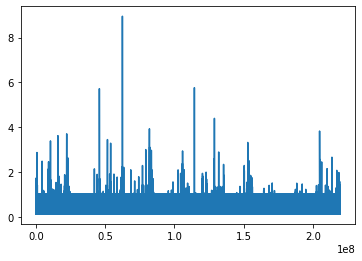

In [37]:
df["inverse_vals"].plot()

<AxesSubplot:>

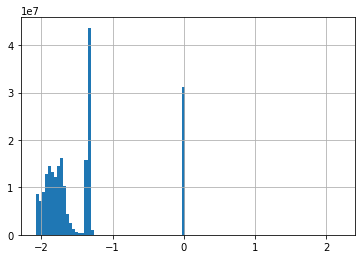

In [41]:
df["neglog"].hist(bins=100)